# Prediction model for predicting price of given car

Note: Consider only the below columns
"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [1]:
# import required libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read file (The given ToyotaCorrla.csv was not working. Hence, used similar file given by Amarnadh sir in sessions)
#df_toyota = pd.read_csv('ToyotaCorolla.csv') # , usecols = ['Price','KM','HP','cc','Doors','Gears','Weight'])
df_toyota = pd.read_excel('/content/Toyota.xlsx', usecols = ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])

## Exploratory Data Analysis

In [3]:
df_toyota.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170


In [4]:
df_toyota.shape

(1436, 9)

In [5]:
df_toyota.dtypes
# All columns are numeric only

Price              int64
Age_08_04          int64
KM                 int64
HP               float64
cc                 int64
Doors              int64
Gears              int64
Quarterly_Tax      int64
Weight             int64
dtype: object

In [6]:
df_toyota.info()
# HP column has two null values. Fill with median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age_08_04      1436 non-null   int64  
 2   KM             1436 non-null   int64  
 3   HP             1434 non-null   float64
 4   cc             1436 non-null   int64  
 5   Doors          1436 non-null   int64  
 6   Gears          1436 non-null   int64  
 7   Quarterly_Tax  1436 non-null   int64  
 8   Weight         1436 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


In [7]:
df_toyota.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [8]:
## Filling HP NAs with above median
print('HP median: ', df_toyota['HP'].median())
df_toyota['HP'] = df_toyota['HP'].fillna(df_toyota['HP'].median())

HP median:  110.0


In [9]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age_08_04      1436 non-null   int64  
 2   KM             1436 non-null   int64  
 3   HP             1436 non-null   float64
 4   cc             1436 non-null   int64  
 5   Doors          1436 non-null   int64  
 6   Gears          1436 non-null   int64  
 7   Quarterly_Tax  1436 non-null   int64  
 8   Weight         1436 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 101.1 KB


In [10]:
# Check for duplicates
df_toyota[df_toyota.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116.0,2000,5,5,234,1320


In [11]:
# Remove duplicates
df_toyota1 = df_toyota.drop([113], axis=0)
df_toyota1.reset_index()
df_toyota1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1435 non-null   int64  
 1   Age_08_04      1435 non-null   int64  
 2   KM             1435 non-null   int64  
 3   HP             1435 non-null   float64
 4   cc             1435 non-null   int64  
 5   Doors          1435 non-null   int64  
 6   Gears          1435 non-null   int64  
 7   Quarterly_Tax  1435 non-null   int64  
 8   Weight         1435 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 112.1 KB


**Outlier Detection and Imputations**

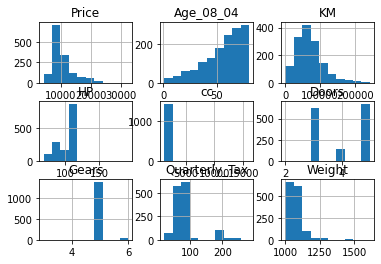

In [12]:
df_toyota1.hist()
plt.show()

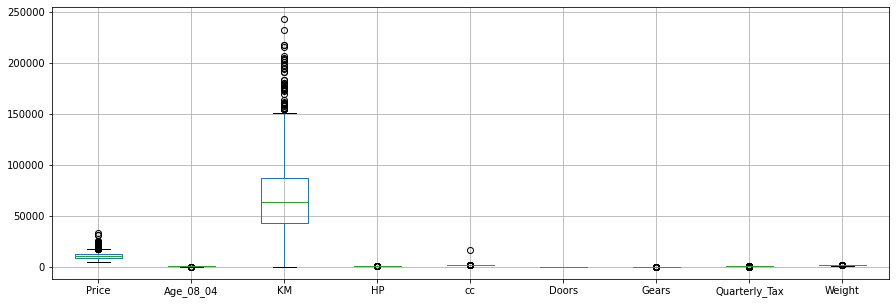

In [13]:
plt.figure(figsize=(15,5))
df_toyota1.boxplot()
plt.show()

Note: Outliers exists in most of the columns

**Function for outliers finding and imputations **

In [14]:
def outliers_imputation(df, column_name, imputation_type): 
  
  box = plt.boxplot(df[column_name])
  plt.show()

  for n in range(1,10):
    
    temp_array = [item.get_ydata() for item in box['fliers']] ## fliers are outliers
    if np.shape(temp_array)[1] == 0 or n >= 10:
      break
  
    # Get the whiskers
    lower_whisker, upper_whisker = [item.get_ydata()[1] for item in box['whiskers']]
    print('lower_whisker', lower_whisker)
    print('upper_whisker', upper_whisker)

    if imputation_type == 'MEDIAN':
      print('MEDIAN applying')
      df[column_name] = np.where(df[column_name] < lower_whisker, df[column_name].median(), df[column_name])
      df[column_name] = np.where(df[column_name] > upper_whisker, df[column_name].median(), df[column_name])
    elif imputation_type == 'DROP':
      print('Dropping')
      # Drop outliers 
      df = df.loc[df[column_name] <= upper_whisker]
      df = df.loc[df[column_name] >= lower_whisker]
    
    box = plt.boxplot(df[column_name])
    plt.show()
    temp_array = [item.get_ydata() for item in box['fliers']] ## fliers are outliers
    
    if np.shape(temp_array)[1] == 0 or n >= 10:
      break

  
  return df






**Outliers - Age_08_04** 

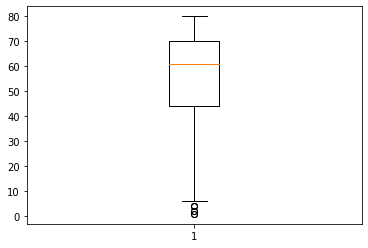

lower_whisker 6.0
upper_whisker 80.0
MEDIAN applying


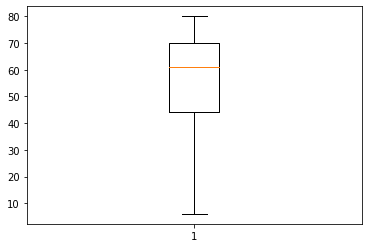

In [15]:
df_toyota1 = outliers_imputation(df_toyota1, 'Age_08_04', 'MEDIAN')

**Outliers - KM**

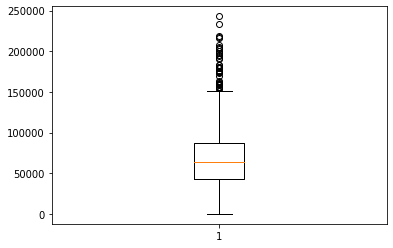

lower_whisker 1.0
upper_whisker 151300.0
Dropping


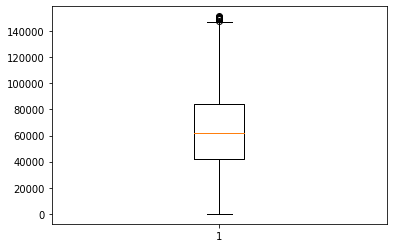

lower_whisker 1.0
upper_whisker 146736.0
Dropping


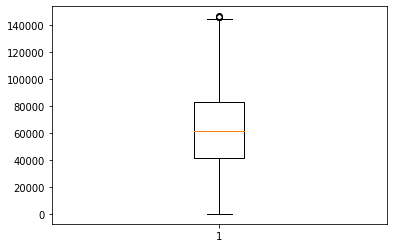

lower_whisker 1.0
upper_whisker 144521.0
Dropping


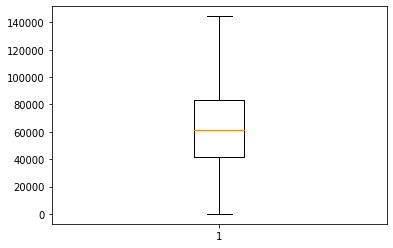

In [16]:
df_toyota1 = outliers_imputation(df_toyota1, 'KM', 'DROP')

**Outliers - HP**

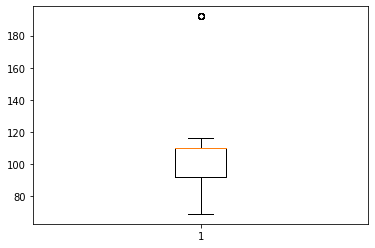

lower_whisker 69.0
upper_whisker 116.0
MEDIAN applying


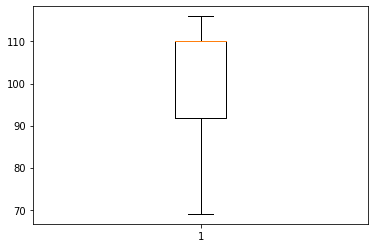

In [17]:
df_toyota1 = outliers_imputation(df_toyota1, 'HP', 'MEDIAN')

**Outliers - cc**

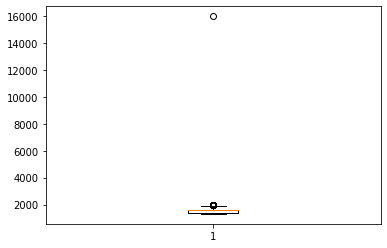

lower_whisker 1300.0
upper_whisker 1900.0
MEDIAN applying


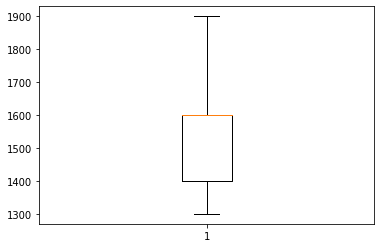

In [18]:
df_toyota1 = outliers_imputation(df_toyota1, 'cc', 'MEDIAN')

**Outliers - Gears**

Gears is an ordinal variable. So, no need to find outliers.

{'boxes': [<matplotlib.lines.Line2D at 0x7f28e5181650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f28e527d510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f28e5201d10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f28e5201790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f28e527d890>,
  <matplotlib.lines.Line2D at 0x7f28e527d5d0>]}

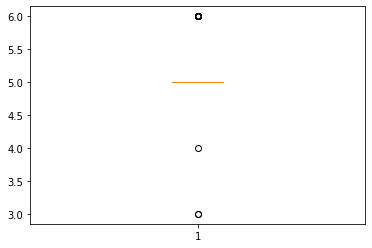

In [19]:
plt.boxplot(df_toyota1['Gears'])

**Outliers - Quarterly_Tax**

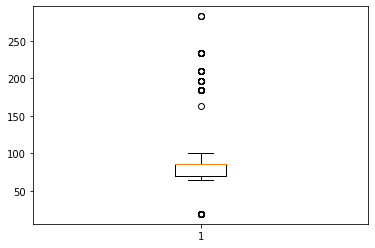

lower_whisker 64.0
upper_whisker 100.0
MEDIAN applying


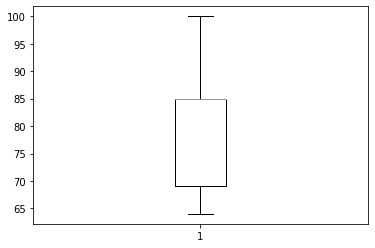

In [20]:
df_toyota1 = outliers_imputation(df_toyota1, 'Quarterly_Tax', 'MEDIAN')

**Outliers - Weight**

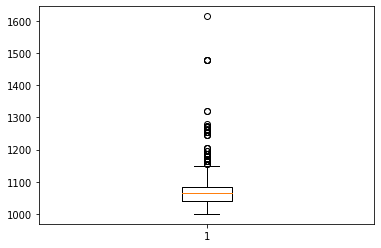

lower_whisker 1000.0
upper_whisker 1150.0
MEDIAN applying


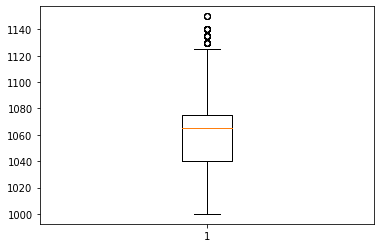

lower_whisker 1000.0
upper_whisker 1125.0
MEDIAN applying


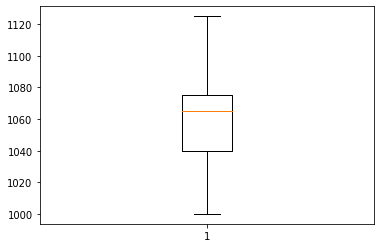

In [21]:
df_toyota1 = outliers_imputation(df_toyota1, 'Weight', 'MEDIAN')

In [22]:
df_toyota1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1374 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1374 non-null   int64  
 1   Age_08_04      1374 non-null   float64
 2   KM             1374 non-null   int64  
 3   HP             1374 non-null   float64
 4   cc             1374 non-null   float64
 5   Doors          1374 non-null   int64  
 6   Gears          1374 non-null   int64  
 7   Quarterly_Tax  1374 non-null   float64
 8   Weight         1374 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 107.3 KB


In [23]:
df_toyota1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.838900,-0.579498,0.180253,0.189041,0.184680,0.062751,0.442848,0.381023
Age_08_04,-0.838900,1.000000,0.536638,-0.073996,-0.136712,-0.138440,-0.006398,-0.351382,-0.362614
KM,-0.579498,0.536638,1.000000,-0.204936,0.095744,-0.027909,0.030356,-0.128734,-0.089103
HP,0.180253,-0.073996,-0.204936,1.000000,0.489261,0.136712,0.082621,0.247509,0.254859
cc,0.189041,-0.136712,0.095744,0.489261,1.000000,0.175907,0.096996,0.423303,0.536022
Doors,0.184680,-0.138440,-0.027909,0.136712,0.175907,1.000000,-0.161593,0.470809,0.409547
Gears,0.062751,-0.006398,0.030356,0.082621,0.096996,-0.161593,1.000000,0.148193,-0.010533
Quarterly_Tax,0.442848,-0.351382,-0.128734,0.247509,0.423303,0.470809,0.148193,1.000000,0.713050
Weight,0.381023,-0.362614,-0.089103,0.254859,0.536022,0.409547,-0.010533,0.713050,1.000000


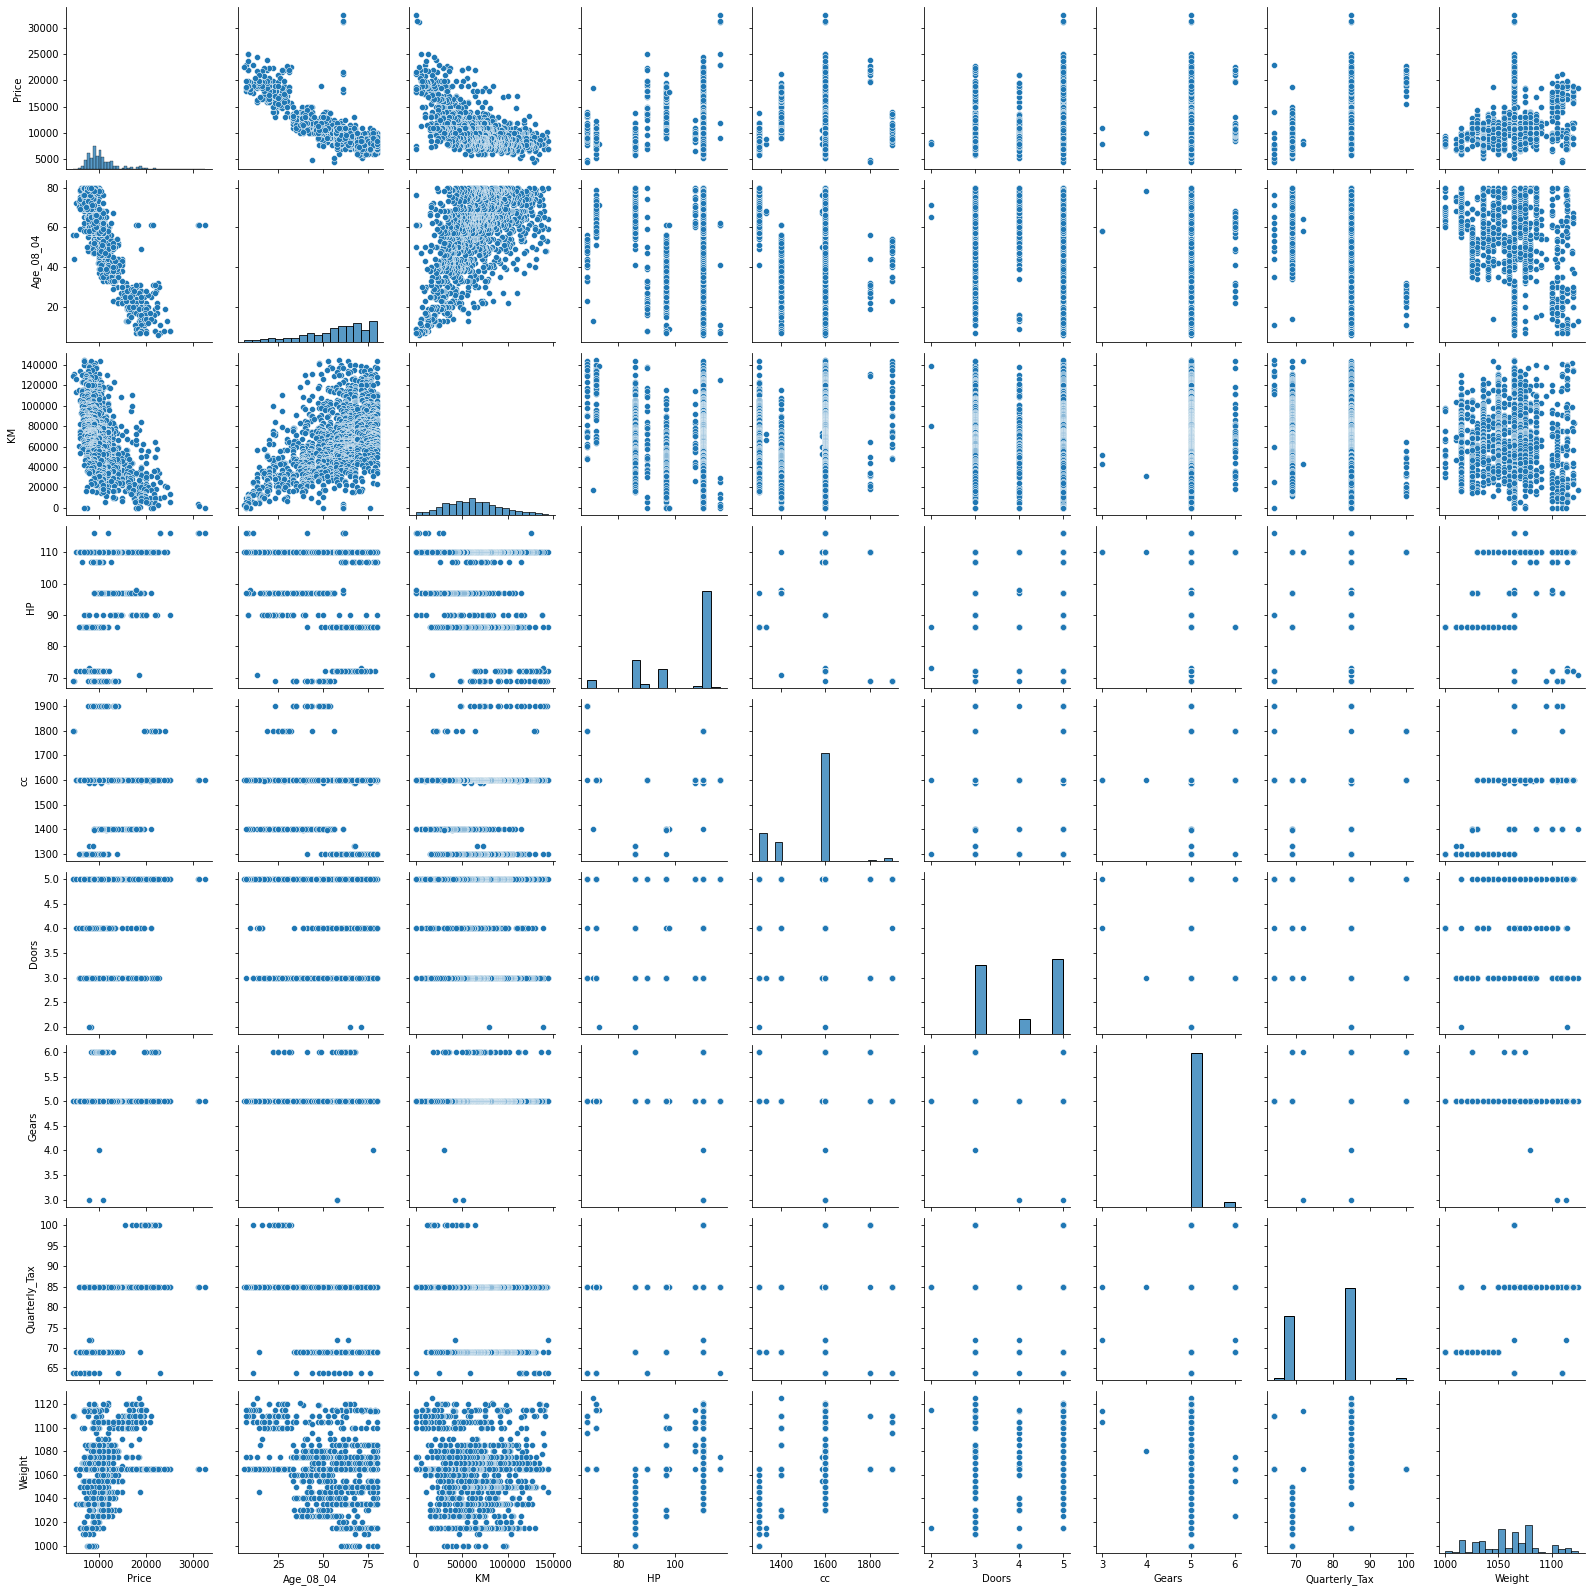

In [24]:
sns.pairplot(df_toyota1)

plt.show()

Note: No collinearity exists between input variables.

##MLR with actual data

In [25]:
model_toyota_act = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df_toyota).fit()

In [26]:
# Coefficients
model_toyota_act.params

Intercept       -5541.586763
Age_08_04        -121.654460
KM                 -0.020795
HP                 31.850110
cc                 -0.120927
Doors              -0.267592
Gears             593.380009
Quarterly_Tax       3.966495
Weight             16.908603
dtype: float64

In [27]:
model_toyota_act.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1132.
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:38:14   Log-Likelihood:                -12375.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5541.5868   1410.934     -3.928      0.000   -8309.313   -2773.860
Age_08_04      -121.6545      2.614    -46.534      0.000    -126.783    -116.526
KM               -0.0208      0.001    -16.611      0.000      -0.023      -0.018
HP               31.8501      2.816     11.310      0.000      26.326      37.374
cc               -0.1209      0.090     -1.343      0.179      -0.298       0.056
Doors            -0.2676     39.976     -0.007      0.995     -78.686      78.151
Gears           593.3800    196.914      3.013      0.003     207.109     979.651
Quarterly_Tax     3.9665      1.309      3.030      0.002       1.399       6.534
Weight           16.9086      1.068     15.830      0.000      14.813      19.004
==============================================================================
Omnibus:                      150.745   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1004.487
Skew:                          -0.213   Prob(JB):                    7.56e-219
Kurtosis:                       7.075   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Predict values for evaluation**

In [28]:
df_toyota1.iloc[0:5,1:9]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23.0,46986,90.0,1600.0,3,5,85.0,1065.0
1,23.0,72937,90.0,1600.0,3,5,85.0,1065.0
2,24.0,41711,90.0,1600.0,3,5,85.0,1065.0
3,26.0,48000,90.0,1600.0,3,5,85.0,1065.0
4,30.0,38500,90.0,1600.0,3,5,85.0,1065.0


In [29]:
model_toyota_act.predict(df_toyota.iloc[0:5,1:9])

0    16805.515249
1    16265.857838
2    16793.555708
3    16419.465491
4    16214.945497
dtype: float64

In [30]:
## Actual price
df_toyota1.iloc[0:5,0:1]

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


## MLR with Normalization

In [31]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df_toyota1.columns
d = scaler.fit_transform(df_toyota1)
df_toyota1_norm = pd.DataFrame(d, columns=names)
df_toyota1_norm.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.322638,0.229730,0.325111,0.446809,0.5,0.333333,0.666667,0.583333,0.52
1,0.331551,0.229730,0.504678,0.446809,0.5,0.333333,0.666667,0.583333,0.52
2,0.338681,0.243243,0.288611,0.446809,0.5,0.333333,0.666667,0.583333,0.52
3,0.374332,0.270270,0.332127,0.446809,0.5,0.333333,0.666667,0.583333,0.52
4,0.331551,0.324324,0.266392,0.446809,0.5,0.333333,0.666667,0.583333,0.52


In [32]:
model_toyota_norm = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df_toyota1_norm).fit()

In [33]:
# Coefficients
model_toyota_norm.params

Intercept        0.419603
Age_08_04       -0.352458
KM              -0.118945
HP               0.016401
cc               0.024920
Doors            0.006341
Gears            0.069544
Quarterly_Tax    0.094511
Weight          -0.023968
dtype: float64

In [34]:
model_toyota_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     543.5
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:38:14   Log-Likelihood:                 1854.7
No. Observations:                1374   AIC:                            -3691.
Df Residuals:                    1365   BIC:                            -3644.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4196      0.021     19.782      0.000       0.378       0.461
Age_08_04        -0.3525      0.009    -39.151      0.000      -0.370      -0.335
KM               -0.1189      0.010    -11.415      0.000      -0.139      -0.099
HP                0.0164      0.008      1.993      0.046       0.000       0.033
cc                0.0249      0.011      2.345      0.019       0.004       0.046
Doors             0.0063      0.006      1.000      0.318      -0.006       0.019
Gears             0.0695      0.028      2.441      0.015       0.014       0.125
Quarterly_Tax     0.0945      0.012      8.135      0.000       0.072       0.117
Weight           -0.0240      0.012     -1.924      0.055      -0.048       0.000
==============================================================================
Omnibus:                     1137.865   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62341.230
Skew:                           3.449   Prob(JB):                         0.00
Kurtosis:                      35.270   Cond. No.                         39.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predict values for evaluation**

In [35]:
df_toyota1_norm.iloc[0:5,1:9]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0.229730,0.325111,0.446809,0.5,0.333333,0.666667,0.583333,0.52
1,0.229730,0.504678,0.446809,0.5,0.333333,0.666667,0.583333,0.52
2,0.243243,0.288611,0.446809,0.5,0.333333,0.666667,0.583333,0.52
3,0.270270,0.332127,0.446809,0.5,0.333333,0.666667,0.583333,0.52
4,0.324324,0.266392,0.446809,0.5,0.333333,0.666667,0.583333,0.52


In [36]:
model_toyota_norm.predict(df_toyota1_norm.iloc[0:5,1:9])

0    0.410896
1    0.389537
2    0.410474
3    0.395772
4    0.384539
dtype: float64

In [37]:
## Actual price
df_toyota1_norm.iloc[0:5,0:1]

,Price
0,0.322638
1,0.331551
2,0.338681
3,0.374332
4,0.331551


## MLR with Log Transformation

In [38]:
# Applying log for columns

df_toyota1_log = pd.DataFrame()

df_toyota1_log['Price'] = np.log10(df_toyota1['Price'])
df_toyota1_log['Age_08_04'] = np.log10(df_toyota1['Age_08_04'])
df_toyota1_log['KM'] = np.log10(df_toyota1['KM'])
df_toyota1_log['HP'] = np.log10(df_toyota1['HP'])
df_toyota1_log['cc'] = np.log10(df_toyota1['cc'])
df_toyota1_log['Doors'] = np.log10(df_toyota1['Doors'])
df_toyota1_log['Gears'] = np.log10(df_toyota1['Gears'])
df_toyota1_log['Quarterly_Tax'] = np.log10(df_toyota1['Quarterly_Tax'])
df_toyota1_log['Weight'] = np.log10(df_toyota1['Weight'])

df_toyota1_log.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,4.130334,1.361728,4.671968,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
1,4.138303,1.361728,4.862948,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
2,4.144574,1.380211,4.620251,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
3,4.174641,1.414973,4.681241,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
4,4.138303,1.477121,4.585461,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735


In [39]:
model_toyota_log = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df_toyota1_log).fit()

In [40]:
# Coefficients
model_toyota_log.params

Intercept        5.170151
Age_08_04       -0.459787
KM              -0.032780
HP               0.173510
cc               0.077016
Doors            0.007128
Gears            0.294591
Quarterly_Tax    0.498074
Weight          -0.647520
dtype: float64

In [41]:
model_toyota_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     543.0
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:38:14   Log-Likelihood:                 1884.7
No. Observations:                1374   AIC:                            -3751.
Df Residuals:                    1365   BIC:                            -3704.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1702      0.645      8.018      0.000       3.905       6.435
Age_08_04        -0.4598      0.010    -46.461      0.000      -0.479      -0.440
KM               -0.0328      0.004     -8.068      0.000      -0.041      -0.025
HP                0.1735      0.035      4.991      0.000       0.105       0.242
cc                0.0770      0.058      1.332      0.183      -0.036       0.190
Doors             0.0071      0.018      0.388      0.698      -0.029       0.043
Gears             0.2946      0.108      2.739      0.006       0.084       0.506
Quarterly_Tax     0.4981      0.056      8.864      0.000       0.388       0.608
Weight           -0.6475      0.245     -2.648      0.008      -1.127      -0.168
==============================================================================
Omnibus:                      193.157   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2432.233
Skew:                           0.066   Prob(JB):                         0.00
Kurtosis:                       9.517   Cond. No.                     3.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Predict values for evaluation**

In [42]:
df_toyota1_log.iloc[0:5,1:9]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,1.361728,4.671968,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
1,1.361728,4.862948,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
2,1.380211,4.620251,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
3,1.414973,4.681241,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735
4,1.477121,4.585461,1.954243,3.20412,0.477121,0.69897,1.929419,3.02735


In [43]:
model_toyota_log.predict(df_toyota1_log.iloc[0:5,1:9])

0    4.186784
1    4.180524
2    4.179981
3    4.161999
4    4.136563
dtype: float64

In [44]:
## Actual price
df_toyota1_log.iloc[0:5,0:1]

,Price
0,4.130334
1,4.138303
2,4.144574
3,4.174641
4,4.138303


## MLR with Sqaure Root Transformation

In [45]:
# Applying Square Root for columns

df_toyota1_sqrt = pd.DataFrame()

df_toyota1_sqrt['Price'] = np.sqrt(df_toyota1['Price'])
df_toyota1_sqrt['Age_08_04'] = np.sqrt(df_toyota1['Age_08_04'])
df_toyota1_sqrt['KM'] = np.sqrt(df_toyota1['KM'])
df_toyota1_sqrt['HP'] = np.sqrt(df_toyota1['HP'])
df_toyota1_sqrt['cc'] = np.sqrt(df_toyota1['cc'])
df_toyota1_sqrt['Doors'] = np.sqrt(df_toyota1['Doors'])
df_toyota1_sqrt['Gears'] = np.sqrt(df_toyota1['Gears'])
df_toyota1_sqrt['Quarterly_Tax'] = np.sqrt(df_toyota1['Quarterly_Tax'])
df_toyota1_sqrt['Weight'] = np.sqrt(df_toyota1['Weight'])

df_toyota1_sqrt.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,116.189500,4.795832,216.762543,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
1,117.260394,4.795832,270.068510,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
2,118.110118,4.898979,204.232710,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
3,122.270193,5.099020,219.089023,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
4,117.260394,5.477226,196.214169,9.486833,40.0,1.732051,2.236068,9.219544,32.634338


In [46]:
model_toyota_sqrt = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=df_toyota1_sqrt).fit()

In [47]:
# Coefficients
model_toyota_sqrt.params

Intercept        125.934494
Age_08_04         -7.840279
KM                -0.050847
HP                 0.895311
cc                 0.511556
Doors              1.119075
Gears             15.437406
Quarterly_Tax      5.560840
Weight            -2.089589
dtype: float64

In [48]:
model_toyota_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     720.2
Date:                Thu, 04 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:38:14   Log-Likelihood:                -4612.2
No. Observations:                1374   AIC:                             9242.
Df Residuals:                    1365   BIC:                             9289.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       125.9345     23.204      5.427      0.000      80.416     171.453
Age_08_04        -7.8403      0.181    -43.225      0.000      -8.196      -7.484
KM               -0.0508      0.004    -13.532      0.000      -0.058      -0.043
HP                0.8953      0.370      2.422      0.016       0.170       1.621
cc                0.5116      0.151      3.387      0.001       0.215       0.808
Doors             1.1191      0.922      1.213      0.225      -0.691       2.929
Gears            15.4374      4.743      3.255      0.001       6.133      24.742
Quarterly_Tax     5.5608      0.629      8.838      0.000       4.327       6.795
Weight           -2.0896      0.728     -2.869      0.004      -3.519      -0.661
==============================================================================
Omnibus:                      723.203   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17162.296
Skew:                           1.934   Prob(JB):                         0.00
Kurtosis:                      19.877   Cond. No.                     3.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Predict values for evaluation**

In [49]:
df_toyota1_sqrt.iloc[0:5,1:9]

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,4.795832,216.762543,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
1,4.795832,270.068510,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
2,4.898979,204.232710,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
3,5.099020,219.089023,9.486833,40.0,1.732051,2.236068,9.219544,32.634338
4,5.477226,196.214169,9.486833,40.0,1.732051,2.236068,9.219544,32.634338


In [50]:
model_toyota_sqrt.predict(df_toyota1_sqrt.iloc[0:5,1:9])

0    125.801429
1    123.090971
2    125.629827
3    123.306056
4    121.503936
dtype: float64

In [51]:
## Actual price
df_toyota1_sqrt.iloc[0:5,0:1]

,Price
0,116.189500
1,117.260394
2,118.110118
3,122.270193
4,117.260394


Final Concusion: 

All four MLR models parameters details are as follows. 

With Actual Data: R-squared:	0.864 Adj. R-squared:	0.863
(p-value of cc: 0.179, p-value of Doors: 0.995)

With Normalized Data: R-squared:	0.761 Adj. R-squared:	0.760
(p-value of Doors: 0.318)

With Log Transformation: R-squared:	0.761 Adj. R-squared:	0.759
(p-value of cc: 0.183, p-value of Doors: 0.698)

With Square Root Transformation: R-squared:	0.808 Adj. R-squared:	0.807
(p-value of Doors: 0.225)

After comparing above models, observed that MLR with Actual Data is best model. However, p-values of two columns are cocern.

Also, we can use Square Root Transformation model since p-value is effected for only one column 'Doors' (Alpha = 0.05 for 95% confidence interval).